## Explorando a Dinâmica entre Desenvolvimento Humano e Igualdade de Gênero em Trabalho Não Remunerado: 
## Uma Análise Detalhada das Regiões e Faixas Etárias

No contexto do estudo sobre igualdade de gênero e desenvolvimento humano, exploraremos um indicador significativo fornecido pela Organização das Nações Unidas (ONU): o número médio de horas despendidas em trabalho doméstico e de cuidados não remunerado. Este indicador, crucial para compreender as dinâmicas de gênero em diferentes regiões, nos permite analisar como as responsabilidades não remuneradas são distribuídas entre os gêneros binários, levando em consideração a idade e a localização geográfica.

Após realizar os tratramentos necessários dos dados, a análise busca identificar padrões e tendências relacionados ao trabalho doméstico não remunerado, destacando áreas de disparidade de gênero e explorando a influência do Índice de Desenvolvimento Humano (IDH) nessas dinâmicas. Ao abordar questões de igualdade e desenvolvimento, nosso objetivo é lançar luz sobre as diferentes realidades enfrentadas por mulheres em várias partes do mundo, contribuindo para discussões mais amplas sobre equidade e políticas públicas.

Ao longo deste notebook, examinaremos a correlação entre o IDH e a disparidade de gênero, identificando padrões específicos em diferentes regiões e faixas etárias. A análise visa fornecer insights valiosos para informar iniciativas e estratégias voltadas para a promoção da igualdade de gênero e o desenvolvimento sustentável.







Definição acordada internacionalmente


"O trabalho doméstico não remunerado refere-se a atividades que incluem a gestão e preparação de alimentos e refeições, limpeza e manutenção da própria habitação e arredores, decoração “faça você mesmo”, manutenção e reparação de bens pessoais e domésticos, cuidado e manutenção de têxteis e calçado, gestão doméstica, cuidados com animais de estimação, compras para a própria casa e familiares e viagens relacionadas a serviços domésticos não remunerados listados anteriormente.

O trabalho de cuidados não remunerado refere-se a atividades relacionadas com cuidados e instrução de crianças, cuidados a familiares e familiares doentes, idosos ou deficientes, ajuda a agregados familiares e familiares adultos não dependentes e viagens relacionadas com estes serviços de cuidados não remunerados"

https://gender-data-hub-2-undesa.hub.arcgis.com/pages/indicators#Theme1

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("trabalho_nao_remunerado.csv", sep="," , encoding= 'UTF-8')

In [48]:
df.dtypes

indicator_label         object
indicator_id            object
indicator_desc          object
minset_series           object
minset_series_desc      object
ref_area                 int64
ref_area_desc           object
iso3                    object
x                      float64
y                      float64
sdg_region              object
time_period              int64
time_detail             object
sex                     object
sex_desc                object
age                     object
age_desc                object
urbanization            object
urbanization_desc       object
obs_value              float64
unit_measure            object
unit_measure_desc       object
nature                  object
nature_desc             object
reporting_type          object
reporting_type_desc     object
comment_obs             object
source_detail           object
source_year              int64
dimensions              object
is_latest_year         float64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indicator_label      2671 non-null   object 
 1   indicator_id         2671 non-null   object 
 2   indicator_desc       2671 non-null   object 
 3   minset_series        2671 non-null   object 
 4   minset_series_desc   2671 non-null   object 
 5   ref_area             2671 non-null   int64  
 6   ref_area_desc        2671 non-null   object 
 7   iso3                 2671 non-null   object 
 8   x                    2671 non-null   float64
 9   y                    2671 non-null   float64
 10  sdg_region           2671 non-null   object 
 11  time_period          2671 non-null   int64  
 12  time_detail          2671 non-null   object 
 13  sex                  2671 non-null   object 
 14  sex_desc             2671 non-null   object 
 15  age                  2671 non-null   o

## Observações a partir de df.info(), que são relevantes à nossa análise:

- O DataFrame possui 2671 entradas (linhas) e 31 colunas;
- O índice é do tipo RangeIndex (sem a especificação de um índice personalizado) variando de 0 a 2670;
- Existem colunas com diferentes tipos de dados, incluindo float64, int64, e object;
- 'Non-Null Count' indica que todas as colunas têm 2671 valores não nulos, indicando que não há valores ausentes para essas colunas;
- Para as colunas numéricas (float64 e int64), podemos obter estatísticas descritivas como média, desvio padrão, mínimo, 25º percentil, mediana (50º percentil), 75º percentil e máximo;
- A contagem de valores não nulos em "is_latest_year", mostra que há 1635 valores não nulos nessa coluna, indicando que existem valores ausentes para algumas entradas.


Agora, vamos visualizar melhor essa questão dos nulos em 'is_latest_year':

In [50]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
print(contagem_valores)


is_latest_year
1.0    1635
NaN    1036
Name: count, dtype: int64


A escolha de tratamento foi a seguinte:

In [51]:
df['is_latest_year'].fillna('Sem Informação', inplace=True)  


C:\Users\santi\AppData\Local\Temp\ipykernel_13800\2848980330.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sem Informação' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['is_latest_year'].fillna('Sem Informação', inplace=True)  # Preencher nulos com uma nova categoria


Confirmando:

In [52]:
contagem_valores = df['is_latest_year'].value_counts(dropna=False)
print(contagem_valores)


is_latest_year
1.0               1635
Sem Informação    1036
Name: count, dtype: int64


In [53]:
print(df.columns)

Index(['indicator_label', 'indicator_id', 'indicator_desc', 'minset_series',
       'minset_series_desc', 'ref_area', 'ref_area_desc', 'iso3', 'x', 'y',
       'sdg_region', 'time_period', 'time_detail', 'sex', 'sex_desc', 'age',
       'age_desc', 'urbanization', 'urbanization_desc', 'obs_value',
       'unit_measure', 'unit_measure_desc', 'nature', 'nature_desc',
       'reporting_type', 'reporting_type_desc', 'comment_obs', 'source_detail',
       'source_year', 'dimensions', 'is_latest_year'],
      dtype='object')


In [54]:
linhas, colunas = df.shape
print(f'O DataFrame tem {linhas} linhas e {colunas} colunas.')


O DataFrame tem 2671 linhas e 31 colunas.


In [55]:
df.head(10)

,indicator_label,indicator_id,indicator_desc,minset_series,minset_series_desc,ref_area,ref_area_desc,iso3,x,y,sdg_region,time_period,time_detail,sex,sex_desc,age,age_desc,urbanization,urbanization_desc,obs_value,unit_measure,unit_measure_desc,nature,nature_desc,reporting_type,reporting_type_desc,comment_obs,source_detail,source_year,dimensions,is_latest_year
0,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,496,Mongolia,MNG,103.072806,46.838921,Eastern and South-Eastern Asia,2015,2015,F,Female,Y12T14,12 to 14 years old,_T,All areas,2.625000,HR_PER_DAY,Hours per day,C,Country Data,G,Global,Results provided for this questionnaire are pr...,National Statistical Office based on Time use ...,2022,"sex, age, urbanization",1.0
1,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,496,Mongolia,MNG,103.072806,46.838921,Eastern and South-Eastern Asia,2015,2015,M,Male,Y12T14,12 to 14 years old,_T,All areas,1.273500,HR_PER_DAY,Hours per day,C,Country Data,G,Global,Results provided for this questionnaire are pr...,National Statistical Office based on Time use ...,2022,"sex, age, urbanization",1.0
2,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,152,Chile,CHL,-71.230290,-35.265288,Latin America and the Caribbean,2015,2015,F,Female,Y12T24,12 to 24 years old,_T,All areas,3.372929,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Instituto Nacional de Estadísticas Chile based...,2022,"sex, age, urbanization",1.0
3,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,152,Chile,CHL,-71.230290,-35.265288,Latin America and the Caribbean,2015,2015,M,Male,Y12T24,12 to 24 years old,_T,All areas,1.729657,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Instituto Nacional de Estadísticas Chile based...,2022,"sex, age, urbanization",1.0
4,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,40,Austria,AUT,14.141725,47.587049,Europe and Northern America,2009,2008-2009,F,Female,Y_GE10,10 years old and over,_T,All areas,4.398877,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,Statistics Austria based on Time Use Survey 20...,2022,"sex, age, urbanization",1.0
5,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,120,Cameroon,CMR,12.741983,5.692387,Sub-Saharan Africa,2014,2014,F,Female,Y_GE10,10 years old and over,_T,All areas,3.492163,HR_PER_DAY,Hours per day,C,Country Data,G,Global,NaN,"INS, Cameroun based on Fourth Cameroon Househo...",2022,"sex, age, urbanization",1.0
6,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,170,Colombia,COL,-73.074468,3.888209,Latin America and the Caribbean,2017,2016-2017,F,Female,Y_GE10,10 years old and over,_T,All areas,3.844214,HR_PER_DAY,Hours per day,C,Country Data,G,Global,"Include ""Time spent on transfers related to un...",DANE based on National Time Use Survey,2022,"sex, age, urbanization",1.0
7,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,170,Colombia,COL,-73.074468,3.888209,Latin America and the Caribbean,2013,2012-2013,F,Female,Y_GE10,10 years old and over,_T,All areas,0.635042,HR_PER_DAY,Hours per day,C,Country Data,G,Global,"Include ""Time spent on transfers related to un...",DANE based on National Time Use Survey,2022,"sex, age, urbanization",Sem Informação
8,I.1,I98ba1fd8,Average number of hours spent on unpaid domest...,S98ba1fd8,Average number of hours spent on unpaid domest...,246,Finland,FIN,23.308447,61.915867,Europe and Northern America,2000,1999-2000,F,Female,Y_GE10,10 years old and over,_T,All areas,3.611000,

## Observações a partir das primeiras linhas do dataframe, com df.head(10):

- Parece haver duplicatas nas primeiras linhas do DataFrame, pois algumas entradas são idênticas. Isso pode ser algo a ser investigado para garantir a consistência e integridade dos dados.

Colunas Relevantes:

- Algumas colunas parecem ser relevantes para a análise, como "indicator_label", "ref_area_desc", "iso3", "obs_value", "unit_measure_desc", "nature_desc", "reporting_type_desc", etc. Essas colunas podem conter informações importantes.

Coordenadas Geográficas:

- As colunas "x" e "y" parecem representar coordenadas geográficas (latitude e longitude). Essas informações podem ser úteis para visualizar ou analisar os dados geograficamente.

Valores Ausentes:

- As entradas 2 e 3 têm valores ausentes para a coluna "comment_obs", o que é indicado pelo "NaN". Isso pode ser um ponto de atenção, dependendo de como irá se desenvolver a análise.
 
Tipo de Dados:

- As colunas "time_period" e "is_latest_year" têm o tipo de dados int64 e float64, respectivamente. Isso pode ser relevante ao realizar operações específicas com essas colunas.

Natureza dos Dados:

- As colunas "nature_desc" e "reporting_type_desc" fornecem informações sobre a natureza dos dados e o tipo de relatório, respectivamente. Essas colunas podem ajudar a contextualizar os dados.

Dimensões:

- A coluna "dimensions" parece conter informações sobre as dimensões dos dados, como sexo, idade e urbanização. Essas dimensões podem ser fundamentais para segmentar e analisar os dados de maneira mais granular.

Unidade de Medida:

- A coluna "unit_measure_desc" fornece a unidade de medida dos dados, que pode ser crucial para interpretar as observações corretamente.

Vamos, então, verificar a suspeita por duplicatas:

In [56]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print(f"Número de duplicatas: {num_duplicates}")

duplicate_rows = df[duplicates]
print(duplicate_rows)

Número de duplicatas: 0
Empty DataFrame
Columns: [indicator_label, indicator_id, indicator_desc, minset_series, minset_series_desc, ref_area, ref_area_desc, iso3, x, y, sdg_region, time_period, time_detail, sex, sex_desc, age, age_desc, urbanization, urbanization_desc, obs_value, unit_measure, unit_measure_desc, nature, nature_desc, reporting_type, reporting_type_desc, comment_obs, source_detail, source_year, dimensions, is_latest_year]
Index: []


Renomeando as colunas com método de dicionário:

In [100]:
# Dicionário de mapeamento dos novos nomes das colunas
novo_nome_colunas = {
    'indicator_label': 'Rotulo do Indicador',
    'indicator_id': 'ID do Indicador',
    'indicator_desc': 'Descricao do Indicador',
    'minset_series': 'Serie Minima',
    'minset_series_desc': 'Descricao Serie Minima',
    'ref_area': 'Area de Referencia',
    'ref_area_desc': 'Descricao Area de Referencia',
    'iso3': 'Codigo ISO3',
    'x': 'Coordenada X',
    'y': 'Coordenada Y',
    'sdg_region': 'Regiao SDG',
    'time_period': 'Periodo de Tempo',
    'time_detail': 'Detalhe do Tempo',
    'sex': 'Genero',
    'sex_desc': 'Descricao do Genero',
    'age': 'Idade',
    'age_desc': 'Descricao Idade',
    'urbanization': 'Urbanizacao',
    'urbanization_desc': 'Descricao Urbanizacao',
    'obs_value': 'Valor Observado',
    'unit_measure': 'Unidade de Medida',
    'unit_measure_desc': 'Descricao Unidade de Medida',
    'nature': 'Natureza',
    'nature_desc': 'Descricao Natureza',
    'reporting_type': 'Tipo de Relatorio',
    'reporting_type_desc': 'Descricao Tipo de Relatorio',
    'comment_obs': 'Observacoes de Comentarios',
    'source_detail': 'Detalhes da Fonte',
    'source_year': 'Ano da Fonte',
    'dimensions': 'Dimensoes',
    'is_latest_year': 'E o Ano Mais Recente'
}

df.rename(columns=novo_nome_colunas, inplace=True)

# Verificar as colunas após a renomeação
print(df.columns)

Index(['Rotulo do Indicador', 'ID do Indicador', 'Descricao do Indicador',
       'Serie Minima', 'Descricao Serie Minima', 'Area de Referencia',
       'Descricao Area de Referencia', 'Codigo ISO3', 'Coordenada X',
       'Coordenada Y', 'Regiao SDG', 'Periodo de Tempo', 'Detalhe do Tempo',
       'Genero', 'Descricao do Genero', 'Idade', 'Descricao Idade',
       'Urbanizacao', 'Descricao Urbanizacao', 'Valor Observado',
       'Unidade de Medida', 'Descricao Unidade de Medida', 'Natureza',
       'Descricao Natureza', 'Tipo de Relatorio',
       'Descricao Tipo de Relatorio', 'Observacoes de Comentarios',
       'Detalhes da Fonte', 'Ano da Fonte', 'Dimensoes',
       'E o Ano Mais Recente'],
      dtype='object')


Restringindo o dataframe somente com as colunas pertinentes à análise:

In [139]:
from IPython.display import display

display(df.columns)

colunas_selecionadas = ['Descricao Area de Referencia', 'Regiao SDG', 'Periodo de Tempo',
                        'Descricao do Genero', 'Descricao Idade', 'Valor Observado',
                        'Descricao Unidade de Medida', 'Ano da Fonte', 'E o Ano Mais Recente']

if set(colunas_selecionadas).issubset(df.columns):
    novo_df = df[colunas_selecionadas]

    display(novo_df.head())



Index(['indicator_label', 'indicator_id', 'indicator_desc', 'minset_series',
       'minset_series_desc', 'ref_area', 'ref_area_desc', 'iso3', 'x', 'y',
       'sdg_region', 'time_period', 'time_detail', 'sex', 'sex_desc', 'age',
       'age_desc', 'urbanization', 'urbanization_desc', 'obs_value',
       'unit_measure', 'unit_measure_desc', 'nature', 'nature_desc',
       'reporting_type', 'reporting_type_desc', 'comment_obs', 'source_detail',
       'source_year', 'dimensions', 'is_latest_year'],
      dtype='object')

Ajustando as configurações, para deixar a visualização mais amigável:

In [102]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(novo_df.head())


  Descricao Area de Referencia                       Regiao SDG  \
0                     Mongolia   Eastern and South-Eastern Asia   
1                     Mongolia   Eastern and South-Eastern Asia   
2                        Chile  Latin America and the Caribbean   
3                        Chile  Latin America and the Caribbean   
4                      Austria      Europe and Northern America   

   Periodo de Tempo Descricao do Genero        Descricao Idade  \
0              2015              Female     12 to 14 years old   
1              2015                Male     12 to 14 years old   
2              2015              Female     12 to 24 years old   
3              2015                Male     12 to 24 years old   
4              2009              Female  10 years old and over   

   Valor Observado Descricao Unidade de Medida  Ano da Fonte  \
0         2.625000               Hours per day          2022   
1         1.273500               Hours per day          2022   
2       

Renomeando algumas colunas para facilitar a compreensão:

In [103]:
novo_df = novo_df.rename(columns={'Descricao do Genero': 'Genero',
                                   'Descricao Idade': 'Idade',
                                   'E o Ano Mais Recente': 'Ano Mais Recente'})
display(pd.DataFrame(columns=novo_df.columns))

,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Genero,Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,Ano Mais Recente


## Descrição das colunas que iremos explorar 

- Area de Referencia (Area de Referencia Description):

Descreve a área geográfica ou região específica relacionada aos dados. Exemplo: "Mongolia," "Chile," "Austria."

- Regiao SDG (SDG Region):

Indica a região associada aos Objetivos de Desenvolvimento Sustentável (SDG). Exemplo: "Eastern and South-Eastern Asia," "Latin America and the Caribbean," "Europe and Northern America."

- Periodo de Tempo (Time Period):

Refere-se ao ano em que os dados foram registrados. Exemplo: 2015, 2009.

- Genero (Gender Description):

Descreve o gênero relacionado aos dados. Exemplo: "Female," "Male."

- Idade (Age Description):

Descreve a faixa etária associada aos dados. Exemplo: "12 to 14 years old," "10 years old and over."

- Valor Observado (Observed Value):

Representa o valor específico observado para o indicador. Exemplo: 2.625 (Horas por dia), 4.398877 (Horas por dia).

- Descricao Unidade de Medida (Unit of Measure Description):

Descreve a unidade de medida associada ao valor observado. Exemplo: "Hours per day."

- Ano da Fonte (Source Year):

Indica o ano da fonte dos dados. Exemplo: 2022.

- Ano Mais Recente (Is Latest Year):

Indica se o ano é o mais recente para o indicador (valor binário). Exemplo: 1.0 (Sim, é o ano mais recente).

Salvando em um novo csv:

In [104]:
novo_df.to_csv("novo_dataframe.csv", index=False)

## Com a conclusão da investigação e a implementação dos tratamentos, estamos prontos para iniciar nossa análise

In [105]:
df = pd.read_csv("novo_dataframe.csv", sep=",", encoding='UTF-8')

In [106]:
df.head(2)

,Descricao Area de Referencia,Regiao SDG,Periodo de Tempo,Genero,Idade,Valor Observado,Descricao Unidade de Medida,Ano da Fonte,Ano Mais Recente
0,Mongolia,Eastern and South-Eastern Asia,2015,Female,12 to 14 years old,2.6250,Hours per day,2022,1.0
1,Mongolia,Eastern and South-Eastern Asia,2015,Male,12 to 14 years old,1.2735,Hours per day,2022,1.0


## Média de horas de trabalho não remunerado por gênero no mundo:

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\348651591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')


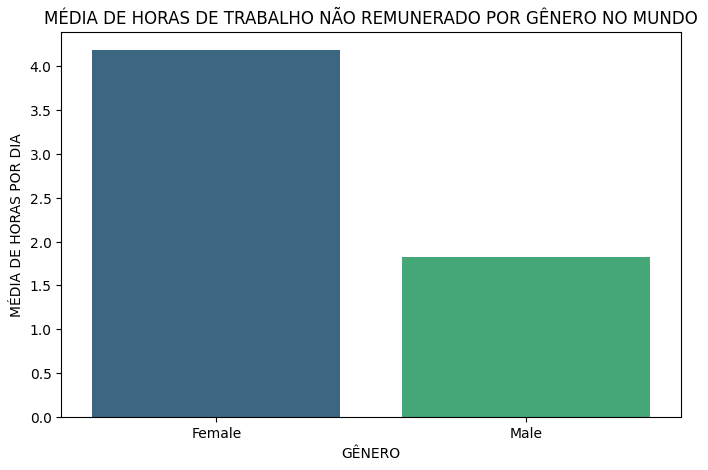

In [124]:
media_valor_por_genero = df.groupby('Genero')['Valor Observado'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Genero', y='Valor Observado', data=media_valor_por_genero, palette='viridis')
plt.title('MÉDIA DE HORAS DE TRABALHO NÃO REMUNERADO POR GÊNERO NO MUNDO')
plt.xlabel('GÊNERO')
plt.ylabel('MÉDIA DE HORAS POR DIA')
plt.show()


Há uma relevante disparidade de gênero no mundo, em relação aos trabalhos não remunerados (domésticos)

In [49]:
valores_unicos = df['Regiao SDG'].unique()
valores_unicos


array(['Eastern and South-Eastern Asia',
       'Latin America and the Caribbean', 'Europe and Northern America',
       'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Australia and New Zealand',
       'Oceania, exc. Australia and New Zealand'], dtype=object)

## Média de horas trabalhadas por gênero , em cada região:

Obs: os gráficos serão plotados em ordem de maior disparidade

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


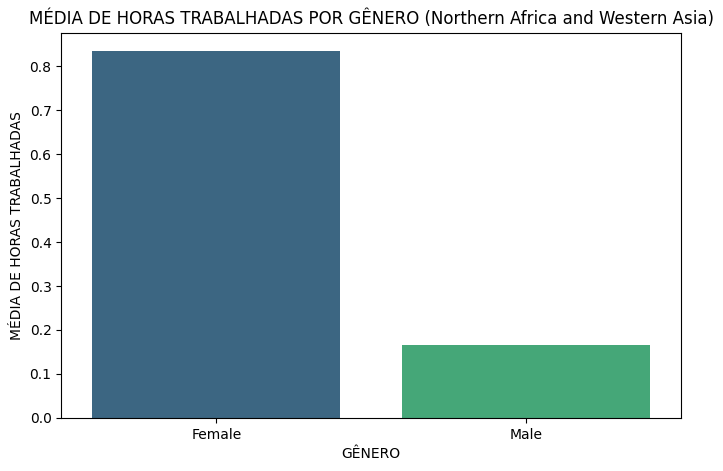

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


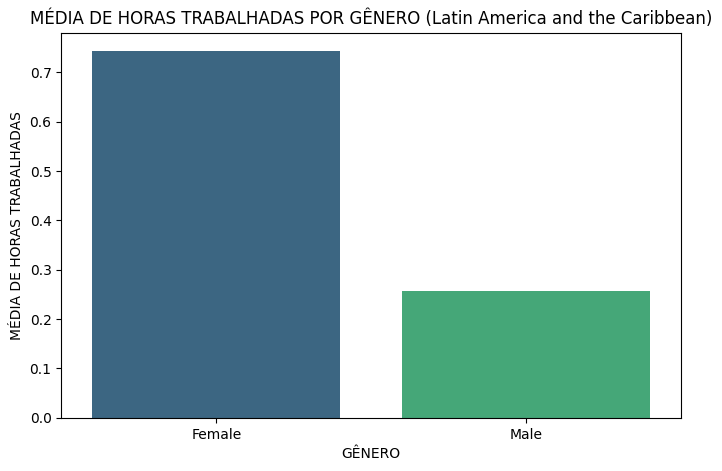

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


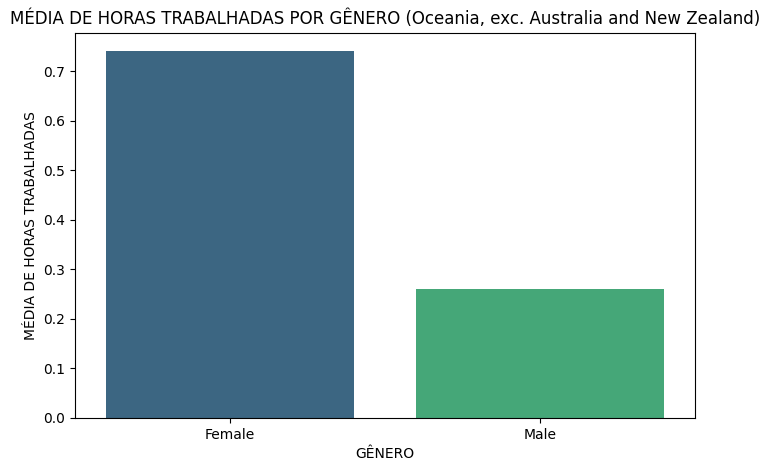

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


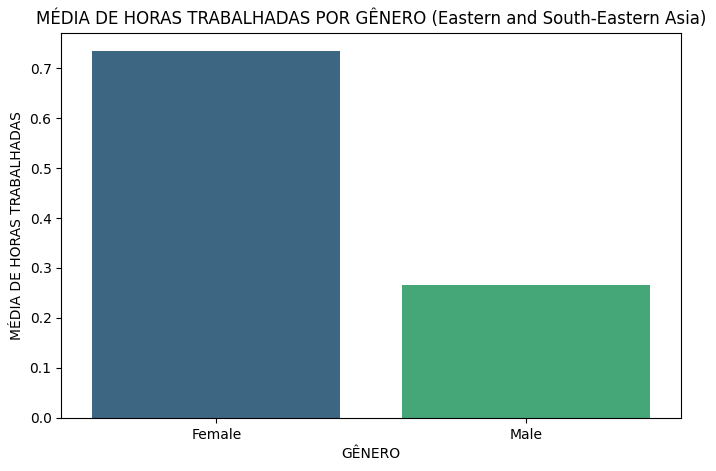

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


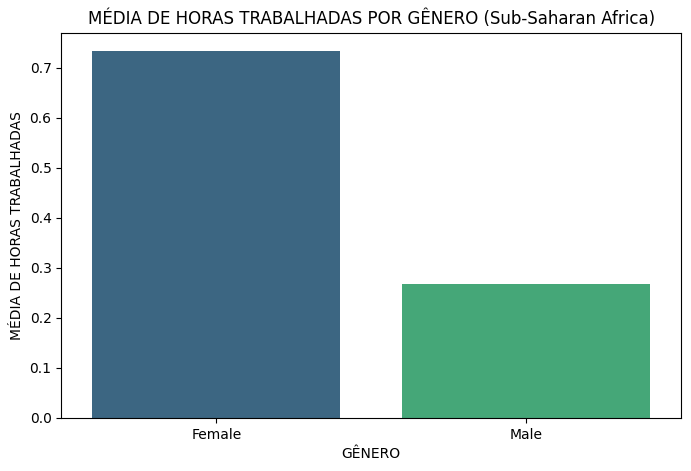

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


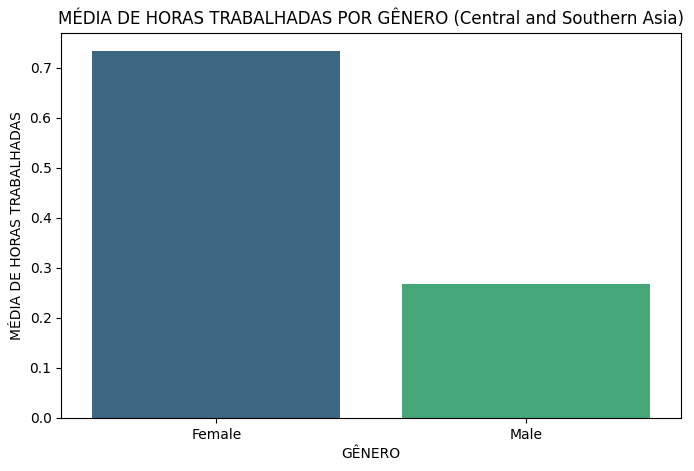

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


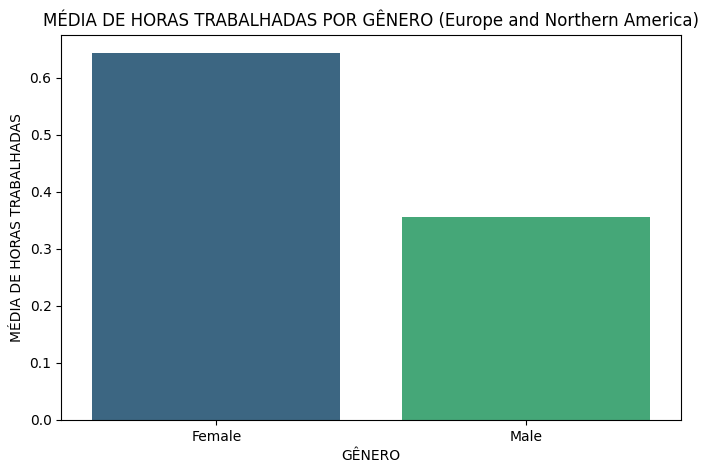

C:\Users\santi\AppData\Local\Temp\ipykernel_7128\3937041567.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')


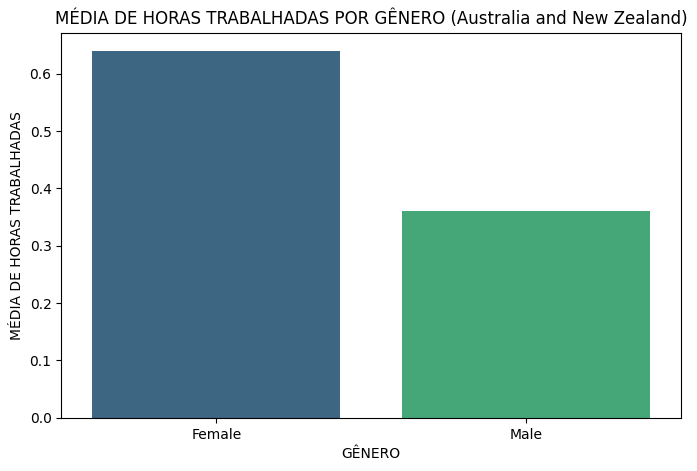

In [122]:
regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean',
           'Europe and Northern America', 'Sub-Saharan Africa',
           'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

proporcoes_regioes = []

# Define uma paleta de cores
cores = sns.color_palette('viridis')

for regiao in regioes:
    df_regiao = df[df['Regiao SDG'] == regiao]
    proporcao_horas = df_regiao.groupby('Genero')['Valor Observado'].sum() / df_regiao['Valor Observado'].sum()
    proporcoes_regioes.append((regiao, proporcao_horas))

proporcoes_regioes.sort(key=lambda x: x[1]['Female'], reverse=True)

for regiao, proporcao_horas in proporcoes_regioes:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=proporcao_horas.index, y=proporcao_horas, palette='viridis')
    plt.title(f'MÉDIA DE HORAS TRABALHADAS POR GÊNERO ({regiao})')
    plt.xlabel('GÊNERO')
    plt.ylabel('MÉDIA DE HORAS TRABALHADAS')
    plt.show()


Maior disparidade entre gêneros, sendo em primeiro lugar a maior disparidade identificada:

Northern Africa and Western Asia em primeiro;

Latin America and the Caribbean em segundo;

Oceania, exc. Australia and New Zealand em terceiro;

Eastern and South-Eastern Asia em quarto;

Sub-Saharan Africa em quinto;

Central and Southern Asia em sexto;

Europe and Northern America em sétimo,

Australia and New Zealand em oitava posição e menor índice de disparidade


## Observação:
Com base nas observações anteriores, direcionaremos nossa análise para o contexto específico do gênero feminino.

## Média de Valores Observados por Região para o Gênero Feminino

 O objetivo do próximo gráfico é apresentar a média dos valores observados para o trabalho não remunerado do gênero feminino em diferentes regiões. Ele busca fornecer uma visão comparativa das médias, permitindo identificar quais regiões têm uma média mais alta em termos de trabalho não remunerado para mulheres.

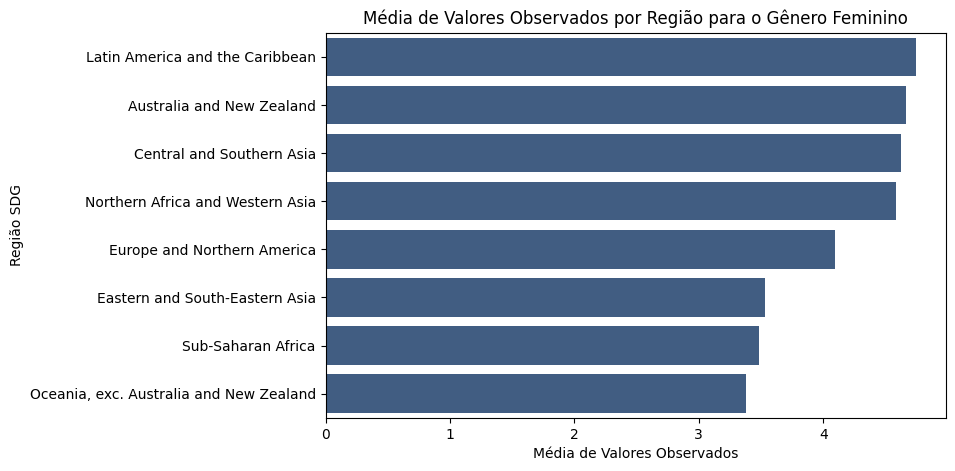

In [102]:
media_feminino_por_regiao = df[df['Genero'] == 'Female'].groupby('Regiao SDG')['Valor Observado'].mean()

media_feminino_por_regiao = media_feminino_por_regiao.sort_values(ascending=False)


plt.figure(figsize=(8, 5))

sns.barplot(x=media_feminino_por_regiao, y=media_feminino_por_regiao.index, color=sns.color_palette('viridis')[1])

plt.title('Média de Valores Observados por Região para o Gênero Feminino')
plt.xlabel('Média de Valores Observados')
plt.ylabel('Região SDG')

plt.show()




A região Latin America and the Caribbean apresenta a maior média de valores observados para o trabalho não remunerado do gênero feminino, indicando uma tendência de alta incidência nesse tipo de trabalho na região.


Australia and New Zealand, Central and Southern Asia e Northern Africa and Western Asia' ocupam as posições seguintes, com diferenças relativamente pequenas entre suas médias. Isso sugere que essas regiões estão próximas em termos de médias, indicando similaridades em relação ao trabalho não remunerado do gênero feminino.

Europe and Northern America, apesar de ocupar a quinta posição, mostra uma diferença moderada em relação às primeiras regiões. Isso indica que, embora esteja em uma posição intermediária, a disparidade em trabalho não remunerado do gênero feminino é menor do que em algumas outras regiões.

Eastern and South-Eastern Asia, apesar de estar em uma posição intermediária, já apresenta uma diferença mais considerável em relação às regiões superiores. Isso sugere uma variação mais significativa nessa parte do gráfico.


Sub-Saharan Africa e Oceania, exc. Australia and New Zealand, encontram-se nas últimas posições, indicando que essas regiões têm, em média, uma incidência menor de trabalho não remunerado do gênero feminino em comparação com as demais regiões.

##  Faixa etária com o maior valor observado (mais horas trabalhadas por dia) para o gênero feminino em cada região

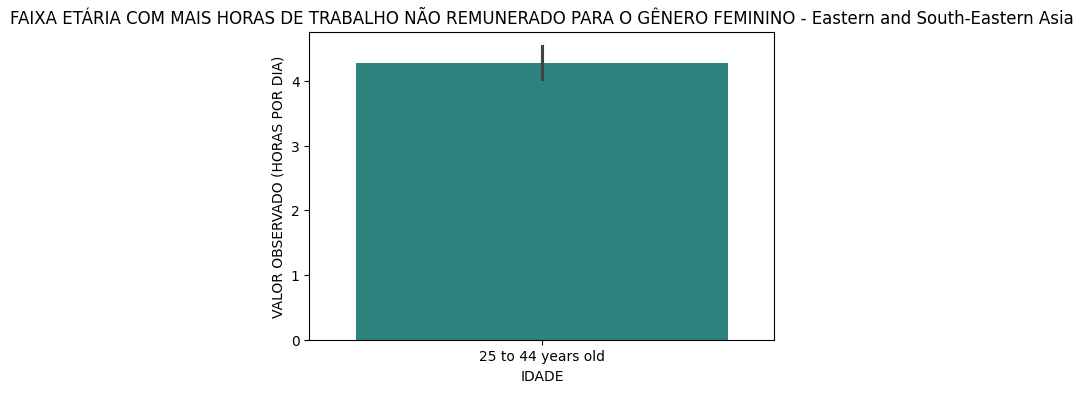

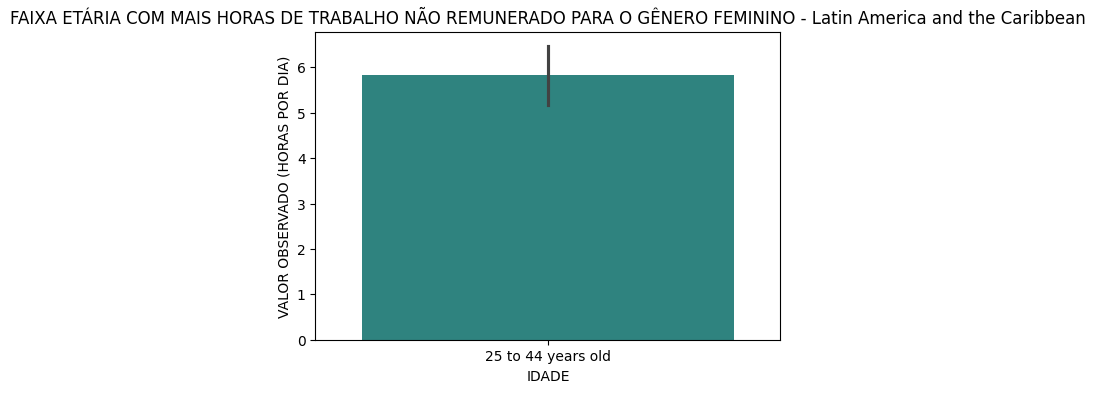

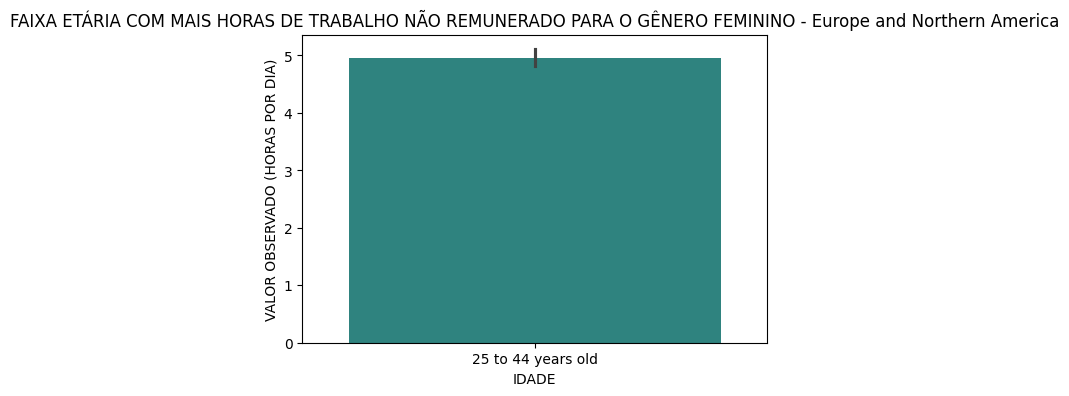

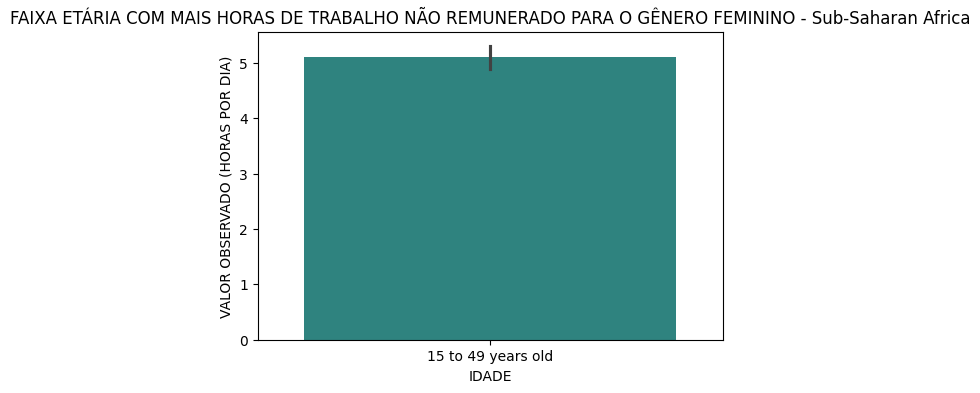

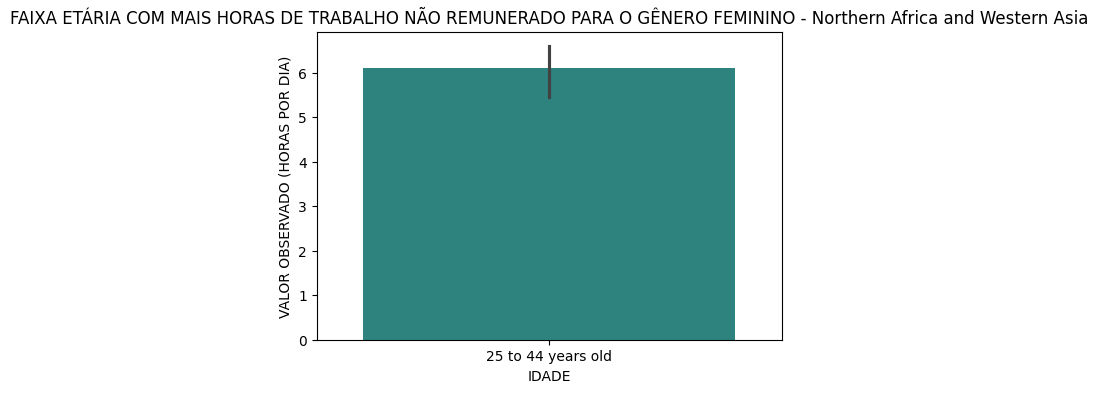

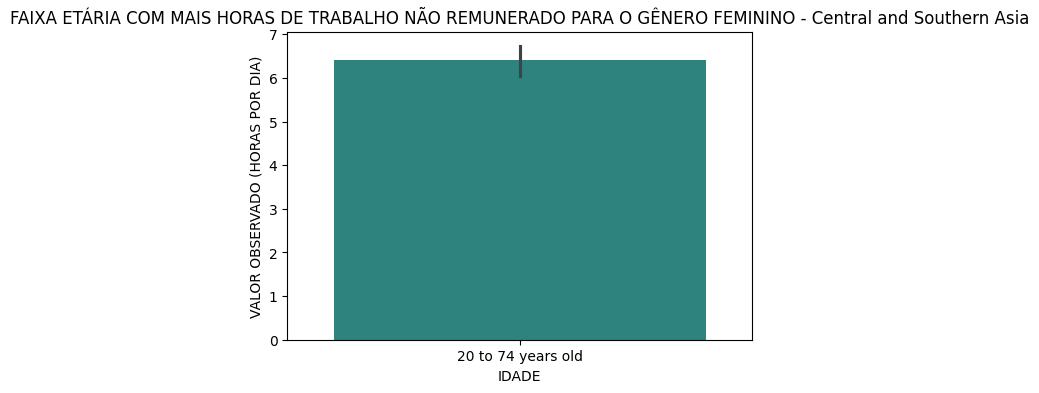

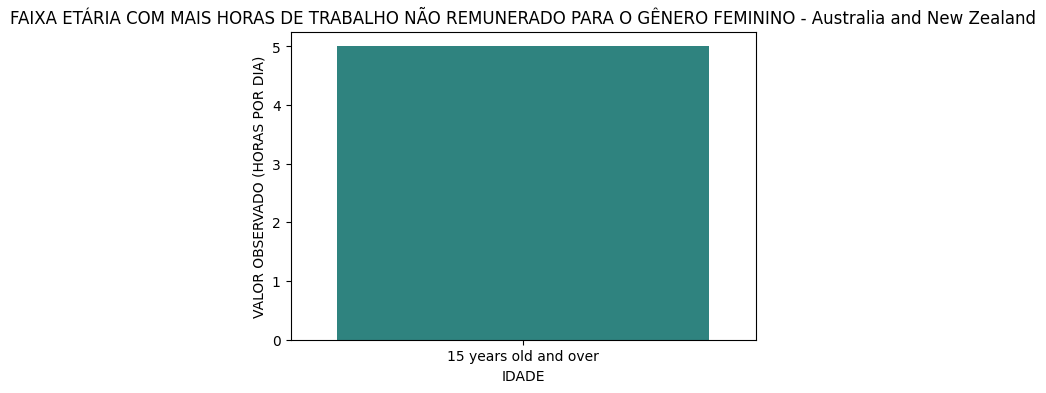

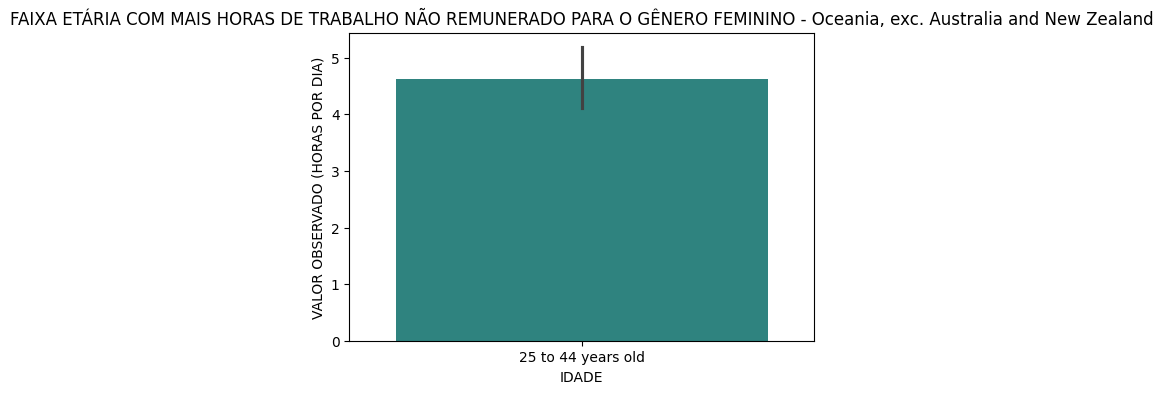

In [127]:
df_female = df[df['Genero'] == 'Female']

regioes = ['Eastern and South-Eastern Asia', 'Latin America and the Caribbean', 'Europe and Northern America',
           'Sub-Saharan Africa', 'Northern Africa and Western Asia', 'Central and Southern Asia',
           'Australia and New Zealand', 'Oceania, exc. Australia and New Zealand']

for regiao in regioes:
    df_regiao = df_female[df_female['Regiao SDG'] == regiao]

    if not df_regiao.empty:
        faixa_etaria_mais_alta = df_regiao.loc[df_regiao['Valor Observado'].idxmax()]['Idade']

        df_faixa_etaria_mais_alta = df_regiao[df_regiao['Idade'] == faixa_etaria_mais_alta]

        plt.figure(figsize=(6, 4))
        sns.barplot(x='Idade', y='Valor Observado', hue='Idade', data=df_faixa_etaria_mais_alta, palette='viridis', legend=False)
        plt.title(f'FAIXA ETÁRIA COM MAIS HORAS DE TRABALHO NÃO REMUNERADO PARA O GÊNERO FEMININO - {regiao}')
        plt.xlabel('IDADE')
        plt.ylabel('VALOR OBSERVADO (HORAS POR DIA)')
        plt.show()

Elaboramos um novo arquivo CSV que integra os resultados da análise:
 - escala progressiva de disparidade de gênero, representada pelos números 1, 2, 3, 4, 5, 6, 7, 8 
 - a faixa etária com maior média de trabalho não remunerado, por região, considerando a idade de início (15 anos)

E a associando ao Índice de Desenvolvimento Humano (IDH) por região, conforme definido pela ONU:


Classificação em 2021| Região                                            

| Very high     | Australia and New Zealand                        
| Very high     | Europe and Northern America                       
| High          | Eastern Asia and South-Eastern Asia               
| High          | Latin America and the Caribbean                   
| High          | Northern Africa and Western Asia                  
| Medium        | Sub-Saharan Africa                                
| Medium        | Central Asia and Southern Asia                    
| Medium        | Oceania (excluding Australia and New Zealand)   



## Importante

Very High = maior IDH entre as regiões

High = alto, mas de IDH intermediário entre as regiões

Medium = menor IDH entre as regiões

		





In [54]:
data_regioes = {
    'Região': ['Australia and New Zealand', 'Sub-Saharan Africa', 'Latin America and the Caribbean',
               'Eastern and South-Eastern Asia', 'Oceania, exc. Australia and New Zealand',
               'Central and Southern Asia', 'Northern Africa and Western Asia', 'Europe and Northern America'],
    'Idade': ['a partir de 15 anos', 'a partir de 15 anos', 'a partir de 25 anos',
              'a partir de 25 anos', 'a partir de 25 anos', 'a partir de 20 anos',
              'a partir de 25 anos', 'a partir de 25 anos'],
    'IDH em 2021': ['Very high', 'Medium', 'High', 'High', 'High', 'Medium', 'High', 'Very high']
}

df_regioes = pd.DataFrame(data_regioes)

data_ranking = {
    'Região': ['Northern Africa and Western Asia', 'Latin America and the Caribbean',
               'Oceania, exc. Australia and New Zealand', 'Eastern and South-Eastern Asia',
               'Sub-Saharan Africa', 'Central and Southern Asia', 'Europe and Northern America',
               'Australia and New Zealand'],
    'Ranking Disparidade de Gênero': [1, 2, 3, 4, 5, 6, 7, 8]
}

df_ranking = pd.DataFrame(data_ranking)

df_final = pd.merge(df_regioes, df_ranking, on='Região')

df_final.to_csv('dados_combinados.csv')


Resultando no dataframe:

In [59]:
df_final.head(8)

,Região,Idade,IDH em 2021,Ranking Disparidade de Gênero
0,Australia and New Zealand,a partir de 15 anos,Very high,8
1,Sub-Saharan Africa,a partir de 15 anos,Medium,5
2,Latin America and the Caribbean,a partir de 25 anos,High,2
3,Eastern and South-Eastern Asia,a partir de 25 anos,High,4
4,"Oceania, exc. Australia and New Zealand",a partir de 25 anos,High,3
5,Central and Southern Asia,a partir de 20 anos,Medium,6
6,Northern Africa and Western Asia,a partir de 25 anos,High,1
7,Europe and Northern America,a partir de 25 anos,Very high,7


Sobre as colunas:

Região: divisão da ONU das regiões de objetivos de desenvolvimento sustentável, presentes no dataset 'Número médio de horas despendidas em trabalho doméstico e de cuidados não remunerado, por sexo, idade e localização' que iniciou está análise;

Idade: idade média do início do trabalho não remunerado, no gênero feminino, por região, presentes no dataset 'Número médio de horas despendidas em trabalho doméstico e de cuidados não remunerado, por sexo, idade e localização' que iniciou está análise;

IDH em 2021: Índice de desenvolvimento humano nas regiões de objetivos de desenvolvimento sustentável da ONU, fonte: https://hdr.undp.org/data-center/human-development-index#/indicies/HDI,

Ranking Disparidade de Gênero: dado colido após análise do dataset que inciou a pesquisa: 'Número médio de horas despendidas em trabalho doméstico e de cuidados não remunerado, por sexo, idade e localização'.

## Agora, vamos analisar a relação entre o IDH e a faixa etária mais jovem de início do trabalho não remunerado no gênero feminino

Utilizamos maior e menor IDH

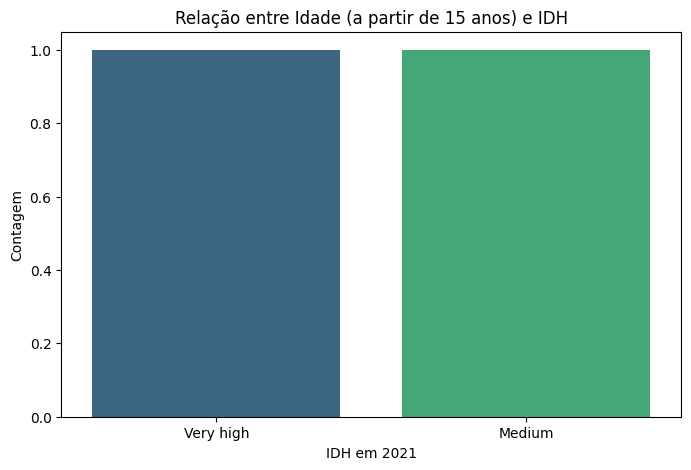

In [128]:
df_filtered = df_final[(df_final['Idade'] == 'a partir de 15 anos') & (df_final['IDH em 2021'].isin(['Very high', 'Medium']))]

plt.figure(figsize=(8, 5))
sns.countplot(x='IDH em 2021', hue='IDH em 2021', data=df_filtered, palette='viridis', legend=False)

plt.title('Relação entre Idade (a partir de 15 anos) e IDH')
plt.xlabel('IDH em 2021')
plt.ylabel('Contagem')  

plt.show()

Sendo "Very high" o valor de maior IDH, "High" o valor intermediário e "Medium" as regiões com menor IDH, observa-se que o fenômeno de jovens mulheres iniciando trabalho não remunerado a partir dos 15 anos ocorre de maneira independente ao IDH da região.

## Correlação entre IDH e disparidade de gênero:

Essa classificação da ONU pode nos confundir, é preciso atenção:

Very High = maior IDH entre as regiões

High = alto, mas de IDH intermediário entre as regiões

Medium = menor IDH entre as regiões


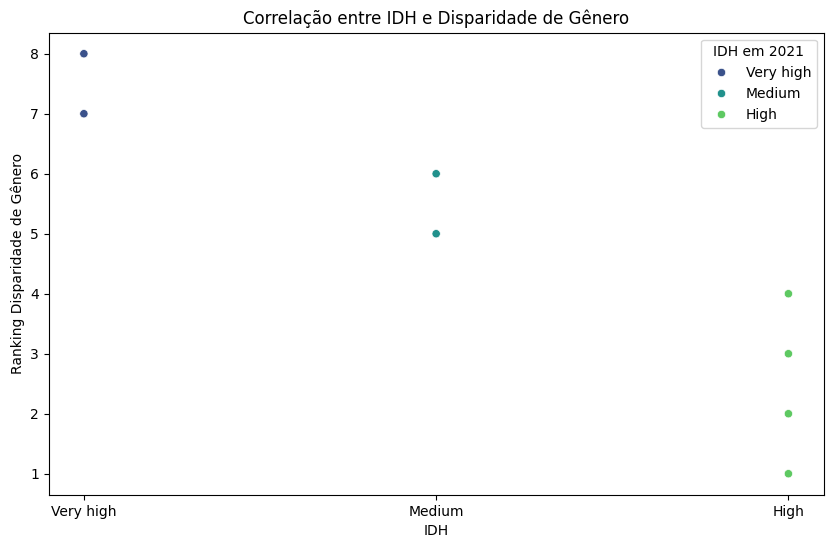

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDH em 2021', y='Ranking Disparidade de Gênero', data=df_final, hue='IDH em 2021', palette='viridis')

plt.title('Correlação entre IDH e Disparidade de Gênero')
plt.xlabel('IDH')
plt.ylabel('Ranking Disparidade de Gênero')

plt.show()

- As regiões com maior IDH (Very High) são as que se observa menor disparidade de gênero em trabalhos não remunerados,

- As regiões com menor IDH, com índice de desenvolvimento humano médio pela classificação da ONU (Medium = menor IDH nas regiões da nossa análise), ficam intermediárias no gráfico e

- As regiões com IDH nem muito alto e nem entre os mais baixos (High) apresentam maior disparidade de gênero.

## Agora, procederemos com a visualização gráfica que relaciona o IDH com a disparidade de gênero em trabalhos não remunerados, excluindo a classificação "High" e mantendo apenas as classificações extremas.

Very High = maior IDH entre as regiões

Medium = menor IDH entre as regiões

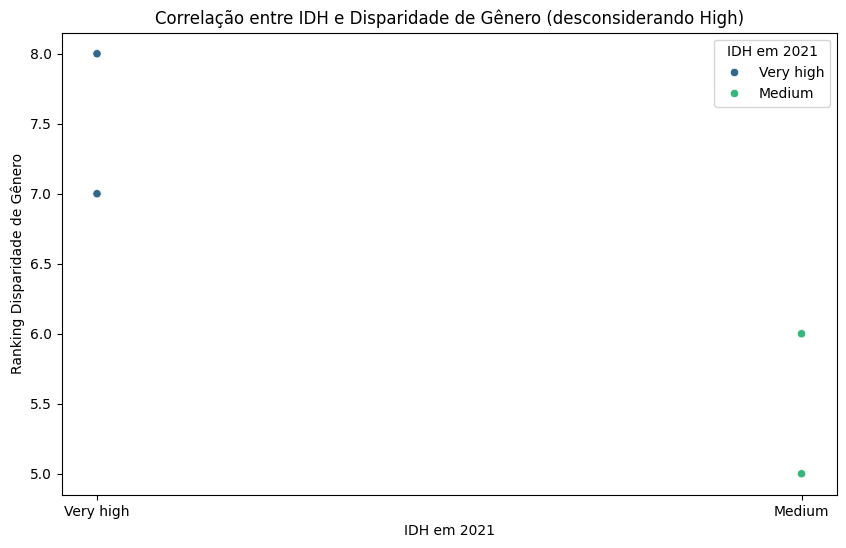

In [90]:
df_filtered = df_final[df_final['IDH em 2021'] != 'High']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDH em 2021', y='Ranking Disparidade de Gênero', data=df_filtered, hue='IDH em 2021', palette='viridis')

plt.title('Correlação entre IDH e Disparidade de Gênero (desconsiderando High)')
plt.xlabel('IDH em 2021')
plt.ylabel('Ranking Disparidade de Gênero')

plt.show()


Pudemos confirmar que maior IDH se correlaciona com menor disparidade de gênero em trabalhos domésticos e IDH mais baixo fica sem extremos, apesar de demonstrar alta disparidade.

## Conclusões

Confirmou-se que regiões com maior IDH tendem a apresentar menor disparidade de gênero em trabalhos não remunerados.
Regiões com menor IDH demonstram alta disparidade, embora sem extremos.

Independência do IDH na Iniciação ao Trabalho Não Remunerado:

Jovens mulheres iniciam trabalho não remunerado a partir dos 15 anos de maneira independente ao IDH da região.

Diferenças nas Regiões:

Latin America and the Caribbean lidera em média de trabalho não remunerado, indicando alta incidência na região.
Australia and New Zealand, Central and Southern Asia e Northern Africa and Western Asia têm médias próximas, sugerindo similaridades.
Europe and Northern America, apesar de intermediária, apresenta menor disparidade comparada a outras regiões.
Eastern and South-Eastern Asia mostra variação significativa em relação às regiões superiores.
Sub-Saharan Africa e Oceania têm médias mais baixas, indicando menor incidência.

Disparidade de Gênero:

Regiões como Northern Africa and Western Asia e Latin America and the Caribbean lideram em disparidade.
Australia and New Zealand apresenta a menor disparidade, indicando uma distribuição mais equitativa nas responsabilidades não remuneradas.

Conclusão Geral:

A análise destaca uma relevante disparidade de gênero no mundo em relação aos trabalhos não remunerados (domésticos), com diferenças significativas entre regiões e uma clara tendência de menor disparidade em regiões com maior IDH.




